In [1]:
!pip install transformers hf_transfer bitsandbytes accelerate datasets pandas -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"

In [3]:
from io import BytesIO
from urllib.request import urlopen
import librosa
from transformers import Qwen2AudioForConditionalGeneration, AutoProcessor, AutoModel, BitsAndBytesConfig
import torch

2025-07-07 18:04:44.048373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751911484.250417      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751911484.305624      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

In [5]:
processor = AutoProcessor.from_pretrained(
    "Qwen/Qwen2-Audio-7B", 
    trust_remote_code=True,
    sampling_rate=16000
)

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [6]:
model = Qwen2AudioForConditionalGeneration.from_pretrained(
    "/kaggle/input/finetuned-ind-1/transformers/default/10/fine-tuned-model/final_version",
    quantization_config=quant_config,
    device_map="auto",
)

config.json:   0%|          | 0.00/853 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.91G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.28G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

In [7]:
model = Qwen2AudioForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-Audio-7B",
    quantization_config=quant_config,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# print(test_inference("https://drive.google.com/uc?export=download&id=1tv_v12DCAYZJyKId0miFl9DdxH8BgoMg"))

In [9]:
# audio = eval_dataset[0]
# print(audio["labels"])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

def runModelEval(dataset):
    y_true = []
    y_pred = []
    evaluation_results = [] # To store individual results

    if not dataset:
        print("Dataset is empty. Cannot calculate metrics.")
        return

    # Collect true and predicted labels
    for item in tqdm(dataset, desc="Evaluating Model"):
        if "audio" not in item or "path" not in item["audio"] or "labels" not in item:
            print(f"Skipping malformed item: {item}")
            continue
            
        audio_path = item["audio"]["path"]
        true_label = str(item["labels"])
        predicted_label = test_inference(audio_path)[0]
        
        y_true.append(true_label)
        y_pred.append(predicted_label)
        
        # Store the details for printing later
        evaluation_results.append({
            "sample": audio_path,
            "true": true_label,
            "pred": predicted_label
        })

    if not y_true:
        print("No valid predictions were made; cannot calculate metrics.")
        return

    # --- Individual Predictions ---
    print("\n" + "="*30)
    print("    INDIVIDUAL PREDICTIONS")
    print("="*30)
    for result in evaluation_results:
        is_correct = "✅" if result["true"] == result["pred"] else "❌"
        print(f"Sample: {result['sample']}")
        print(f"  - True Label: {result['true']:<10} | Predicted: {result['pred']:<10} {is_correct}")
    
    # Define labels for the reports
    labels = sorted(list(set(y_true)))

    # --- Classification Report ---
    print("\n" + "="*30)
    print("    CLASSIFICATION REPORT")
    print("="*30)
    report = classification_report(y_true, y_pred, labels=labels, zero_division=0)
    print(report)

    # --- Overall Accuracy ---
    accuracy = np.mean(np.array(y_pred) == np.array(y_true))
    print(f"Overall Accuracy: {accuracy:.2%}\n")
    
    # --- Confusion Matrix ---
    print("="*30)
    print("      CONFUSION MATRIX")
    print("="*30)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

In [11]:
import librosa
from urllib.request import urlopen
from io import BytesIO
import torch
import time

def timing_decorator(func):
    """
    A decorator that prints the execution time of the function it decorates.
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time for {func.__name__}: {end_time - start_time:.4f} seconds")
        return result
    return wrapper

@timing_decorator
def test_inference(audio_path_or_url, tuned: bool = False):
    """
    This function takes an audio file (local path or URL) and determines if it's a scam call.
    """
    # Define the conversation structure for the model
    conversation = [
        {"role": "system", "content": "Kamu adalah model yang menenetukan apakah percakapan yang dimasukkan dari dua orang dalam telepon tersebut adalah penipuan telekom atau tidak."},
        {"role": "user", "content": [
            {"type": "audio", "audio": audio_path_or_url}, 
            {"type": "text", "text": "Klasifikasikan audio ini: 0 atau 1."},
        ]}
    ]
    
    # Apply the chat template to format the text part of the prompt
    # Make sure the `processor` is defined and loaded in your environment
    text = processor.apply_chat_template(conversation, add_generation_prompt=True, tokenize=False)
    
    # Prepare audio list for processing
    audios = []
    
    # Find the audio in the conversation and load it correctly
    for message in conversation:
        if isinstance(message["content"], list):
            for element in message["content"]:
                if element["type"] == "audio":
                    path = element["audio"]
                    audio_data = None
                    
                    # Check if it's a remote URL or a local file path
                    if path.startswith("http"):
                        # It's a URL, so download it first
                        with urlopen(path) as response:
                            audio_bytes = BytesIO(response.read())
                            audio_data, _ = librosa.load(
                                audio_bytes, 
                                sr=processor.feature_extractor.sampling_rate
                            )
                    else:
                        # It's a local path, so load it directly
                        audio_data, _ = librosa.load(
                            path, 
                            sr=processor.feature_extractor.sampling_rate
                        )

                    if audio_data is not None:
                        audios.append(audio_data)

    # Now 'audios' contains the actual audio waveform (NumPy array)
    if not audios:
        raise ValueError("Audio processing failed. No audio data was loaded.")

    # Process the text and audio together
    # Ensure the `processor` is available
    inputs = processor(
        text=text,
        audio=audios,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to("cuda") # Make sure you have a CUDA-enabled GPU
    
    # Generate the response from the model
    if tuned:
        generated_ids = tuned_model.generate(**inputs, max_new_tokens=2)
    else:
        generated_ids = model.generate(**inputs, max_new_tokens=2)
        
    # Isolate the newly generated tokens
    generated_ids = generated_ids[:, inputs.input_ids.size(1):]
    
    # Decode the response into text
    response = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    
    return response

In [12]:
print(processor.tokenizer.bos_token)
print(processor.tokenizer.bos_token_id)
print("----")
print(processor.tokenizer.eos_token)
print(processor.tokenizer.eos_token_id)
print("----")
print(processor.tokenizer.pad_token_id)
print("----")
print(processor.tokenizer.chat_template)

None
None
----
<|im_end|>
151645
----
151643
----
{% for message in messages %}{% if loop.first and messages[0]['role'] != 'system' %}{{ '<|im_start|>system
You are a helpful assistant.<|im_end|>
' }}{% endif %}{{'<|im_start|>' + message['role'] + '
' + message['content'] + '<|im_end|>' + '
'}}{% endfor %}{% if add_generation_prompt %}{{ '<|im_start|>assistant
' }}{% endif %}


In [13]:
import torch
import numpy as np
import librosa
from typing import List, Dict, Any

class AudioDataCollator:
    def __init__(self, processor, task_prompt: str, max_length: int = None, debug_mode: bool = False):
        self.processor = processor
        self.task_prompt = task_prompt
        self.max_length = max_length or getattr(processor.feature_extractor, "n_samples", 320000)
        self.sampling_rate = processor.feature_extractor.sampling_rate

        # --- DEBUG ---
        self.debug_mode = debug_mode
        if self.debug_mode:
            self.tokenizer_max_length = processor.tokenizer.model_max_length
            print("--- AudioDataCollator initialized in DEBUG MODE ---")
            print(f"Audio max_length (samples): {self.max_length}")
            print(f"Tokenizer model_max_length (tokens): {self.tokenizer_max_length}")
        # --- END DEBUG ---

    def process_audio(self, audio_path: str) -> np.ndarray:
        try:
            audio, _ = librosa.load(audio_path, sr=self.sampling_rate)
            return audio.astype(np.float32)
        except Exception as e:
            raise RuntimeError(f"Error processing audio from {audio_path}: {str(e)}")

    def __call__(self, examples: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        valid_examples = []
        audios = []
        combined_texts = []
        
        # --- DEBUG ---
        if self.debug_mode:
            print(f"\n--- Processing batch of {len(examples)} examples ---")
        # --- END DEBUG ---

        for i, example in enumerate(examples):
            try:
                audio_input = example["audio"]
                if isinstance(audio_input, dict):
                    audio_path = audio_input['path']
                else:
                    audio_path = audio_input
                
                classification_label = str(example.get("labels", "")) 
                if self.debug_mode:
                    print(f"[DEBUG Batch item {i}] Classification Label: '{classification_label}'")
                    if not classification_label:
                        print(f"  [WARNING Batch item {i}] Label is EMPTY or missing.")
                
                audio = self.process_audio(audio_path)
                audios.append(audio)
                
                conversation = [
                    {"role": "user", "content": [
                        {"type": "audio", "audio": audio_path},
                        {"type": "text", "text": self.task_prompt},
                    ]},
                    # GUNAKAN LABEL KLASIFIKASI SEBAGAI RESPON ASISTEN
                    {"role": "assistant", "content": classification_label} 
                ]

                combined_text = self.processor.apply_chat_template(
                    conversation, add_generation_prompt=True, tokenize=False,
                )
                
                # --- DEBUG ---
                if self.debug_mode:
                    print(f"[DEBUG Batch item {i}] Combined text length after template (chars): {len(combined_text)}")
                # --- END DEBUG ---

                combined_texts.append(combined_text)
                valid_examples.append(example)

            except Exception as e:
                print(f"Skipping example due to error: {e}")
                continue

        if not valid_examples:
            raise ValueError("No valid examples were found in the batch.")

        try:
            inputs = self.processor(
                text=list(combined_texts),
                audio=list(audios),
                return_tensors="pt",
                padding=True,
                truncation=True
            )
        except Exception as e:
            raise RuntimeError(f"Error in processor during batch tokenization: {e}")

        # --- DEBUG ---
        if self.debug_mode:
            print("\n--- Post-Tokenization Debug ---")
            for i in range(len(inputs["input_ids"])):
                token_len = len(inputs["input_ids"][i])
                print(f"[DEBUG Batch item {i}] Final tokenized length: {token_len}")
                # Check if the sequence was potentially truncated
                if self.tokenizer_max_length and token_len >= self.tokenizer_max_length:
                     print(f"  [WARNING Batch item {i}] Text has been TRUNCATED or is at max model length ({self.tokenizer_max_length} tokens).")
            print("---------------------------------")
        # --- END DEBUG ---

        labels = inputs["input_ids"].clone()
        assistant_prompt = "<|im_start|>assistant"
        assistant_start_tokens = self.processor.tokenizer.encode(assistant_prompt, add_special_tokens=False)
        assistant_start_tensor = torch.tensor(assistant_start_tokens, dtype=torch.long)
        
        for i in range(len(combined_texts)):
            input_ids_row = inputs["input_ids"][i]
            assistant_start_idx = -1
            for j in range(len(input_ids_row) - len(assistant_start_tensor) + 1):
                if torch.equal(input_ids_row[j : j + len(assistant_start_tensor)], assistant_start_tensor):
                    assistant_start_idx = j
                    break
            
            if assistant_start_idx != -1:
                labels[i, :assistant_start_idx + len(assistant_start_tensor)] = -100
            else:
                if self.debug_mode:
                    print(f"  [WARNING Batch item {i}] Assistant prompt token was not found. Entire sequence will be masked.")
                labels[i, :] = -100
        
        feature_attention_mask = inputs.get("feature_attention_mask", torch.ones_like(inputs.input_features))

        return {
            "input_ids": inputs.input_ids,
            "attention_mask": inputs.attention_mask,
            "input_features": inputs.input_features,
            "feature_attention_mask": feature_attention_mask,
            "labels": labels
        }

In [14]:
TASK_PROMPT = "Klasifikasikan audio ini: 0 atau 1."

data_collator = AudioDataCollator(
    processor=processor,
    task_prompt=TASK_PROMPT,
)

In [15]:
KAGGLE_AUDIO_PATH_PREFIX = "/kaggle/input/audiodatasetindonesia"
def prepend_path(example):
    example['audio'] = os.path.join(KAGGLE_AUDIO_PATH_PREFIX, example['audio'])
    return example

In [16]:
from datasets import load_dataset, Audio, Dataset, concatenate_datasets
from collections import Counter

# Load your initial dataset
data_files = {"train": "/kaggle/input/audiodatasetindonesia/dataset_input.csv"}
full_dataset = load_dataset("csv", data_files=data_files, split="train")

full_dataset = full_dataset.map(prepend_path)
full_dataset = full_dataset.cast_column("audio", Audio(sampling_rate=16000))
full_dataset = full_dataset.rename_column("text", "labels")

# Convert labels to integers for filtering
full_dataset = full_dataset.map(lambda example: {"labels": int(example["labels"])})

# Check the initial label distribution
print("Initial label distribution:")
print(Counter(full_dataset['labels']))

dataset_label_0 = full_dataset.filter(lambda example: example["labels"] == 0) # Total 106 samples
dataset_label_1 = full_dataset.filter(lambda example: example["labels"] == 1) # Total 517 samples

# Step 1: Split each filtered dataset into training and a temporary set (for validation and testing)
# We will use a 70% training and 30% temporary split.
train_test_split_0 = dataset_label_0.train_test_split(test_size=0.3, seed=42)
train_label_0 = train_test_split_0['train']
temp_label_0 = train_test_split_0['test']

train_test_split_1 = dataset_label_1.train_test_split(test_size=0.3, seed=42)
train_label_1 = train_test_split_1['train']
temp_label_1 = train_test_split_1['test']

# Step 2: Split the temporary sets into validation and testing sets
val_test_split_0 = temp_label_0.train_test_split(test_size=0.5, seed=42)
val_label_0 = val_test_split_0['train']
test_label_0 = val_test_split_0['test']

val_test_split_1 = temp_label_1.train_test_split(test_size=0.5, seed=42)
val_label_1 = val_test_split_1['train']
test_label_1 = val_test_split_1['test']

# Step 3: Concatenate the corresponding splits to create the final datasets
train_dataset = concatenate_datasets([train_label_0, train_label_1])
validation_dataset = concatenate_datasets([val_label_0, val_label_1])
test_dataset = concatenate_datasets([test_label_0, test_label_1])

# Shuffle the final datasets to ensure random distribution of labels
train_dataset = train_dataset.shuffle(seed=42)
eval_dataset = validation_dataset.shuffle(seed=42)
test_dataset = test_dataset.shuffle(seed=42)


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

Initial label distribution:
Counter({1: 517, 0: 517})


Filter:   0%|          | 0/1034 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1034 [00:00<?, ? examples/s]

In [17]:
print(model)

Qwen2AudioForConditionalGeneration(
  (audio_tower): Qwen2AudioEncoder(
    (conv1): Conv1d(128, 1280, kernel_size=(3,), stride=(1,), padding=(1,))
    (conv2): Conv1d(1280, 1280, kernel_size=(3,), stride=(2,), padding=(1,))
    (embed_positions): Embedding(1500, 1280)
    (layers): ModuleList(
      (0-31): 32 x Qwen2AudioEncoderLayer(
        (self_attn): Qwen2AudioAttention(
          (k_proj): Linear4bit(in_features=1280, out_features=1280, bias=False)
          (v_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
          (q_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
          (out_proj): Linear4bit(in_features=1280, out_features=1280, bias=True)
        )
        (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (activation_fn): GELUActivation()
        (fc1): Linear4bit(in_features=1280, out_features=5120, bias=True)
        (fc2): Linear4bit(in_features=5120, out_features=1280, bias=True)
        (fina

In [18]:
from peft import LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=32,
    use_rslora=True,
    target_modules="all-linear",
    lora_dropout=0.1,
    bias='none',
    task_type="CAUSAL_LM"
)

In [19]:
from peft import get_peft_model
model = get_peft_model(model, lora_config)

In [20]:
model.print_trainable_parameters()

trainable params: 108,843,008 || all params: 8,505,937,920 || trainable%: 1.2796


In [21]:
from transformers import TrainingArguments, Trainer

lr = 2e-5

epochs=1
schedule="constant"

batch_size = 2

run_name = f"fine-tune-audio-telecom-scam-lr-{lr}-epochs-{epochs}-schedule-{schedule}"
training_args = TrainingArguments(
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size, 
    per_device_eval_batch_size=batch_size, 
    gradient_accumulation_steps=1,
    learning_rate=lr, 
    weight_decay=0.01, 
    logging_steps=0.1, 
    output_dir="fine-tuned-model",
    eval_strategy="steps", 
    eval_steps=0.2, 
    lr_scheduler_type=schedule,
    # save_strategy="steps"
    # save_steps=250,
    # save_total_limit=1,
    fp16=True,
    remove_unused_columns=False, 
    report_to="tensorboard", 
    run_name=run_name, 
    logging_dir=f"./logs/{run_name}", 
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={'use_reentrant':False},
    label_names=["labels"]
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [22]:
model.config.use_cache = False
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss,Validation Loss
73,3.449000,0.186254
146,0.141000,0.069553
219,0.059200,0.055767
292,0.033300,0.030773


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


TrainOutput(global_step=361, training_loss=0.47041761586210407, metrics={'train_runtime': 6380.0242, 'train_samples_per_second': 0.113, 'train_steps_per_second': 0.057, 'total_flos': 2.713422556239053e+16, 'train_loss': 0.47041761586210407, 'epoch': 1.0})

In [23]:
from transformers import TrainingArguments, Trainer

lr = 2e-5

epochs=1
schedule="cosine"

batch_size = 2

run_name = f"fine-tune-audio-telecom-scam-lr-{lr}-epochs-{epochs}-schedule-{schedule}"
training_args = TrainingArguments(
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size, 
    per_device_eval_batch_size=batch_size, 
    gradient_accumulation_steps=1,
    learning_rate=lr, 
    weight_decay=0.01, 
    logging_steps=0.1, 
    output_dir="fine-tuned-model",
    eval_strategy="steps", 
    eval_steps=0.2, 
    lr_scheduler_type=schedule,
    save_strategy="steps",     
    save_steps=0.2,             
    save_total_limit=2,         
    load_best_model_at_end=True,
    fp16=True,
    remove_unused_columns=False, 
    report_to="tensorboard", 
    run_name=run_name, 
    logging_dir=f"./logs/{run_name}", 
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={'use_reentrant':False},
    label_names=["labels"]
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [24]:
trainer.train()

Step,Training Loss,Validation Loss
73,0.071800,0.063631
146,0.126600,0.017969
219,0.038900,0.027114
292,0.029200,0.015309


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers fou

TrainOutput(global_step=361, training_loss=0.03910714316762625, metrics={'train_runtime': 6391.991, 'train_samples_per_second': 0.113, 'train_steps_per_second': 0.056, 'total_flos': 2.713422556239053e+16, 'train_loss': 0.03910714316762625, 'epoch': 1.0})

In [25]:
trainer.save_model("fine-tuned-model/final_version")

/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:230: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


Evaluating Model:   1%|          | 1/156 [00:03<08:16,  3.20s/it]

Execution time for test_inference: 3.1814 seconds


Evaluating Model:   1%|▏         | 2/156 [00:05<07:33,  2.95s/it]

Execution time for test_inference: 2.7576 seconds


Evaluating Model:   2%|▏         | 3/156 [00:08<07:18,  2.86s/it]

Execution time for test_inference: 2.7560 seconds


Evaluating Model:   3%|▎         | 4/156 [00:11<07:09,  2.83s/it]

Execution time for test_inference: 2.7563 seconds


Evaluating Model:   3%|▎         | 5/156 [00:14<07:03,  2.80s/it]

Execution time for test_inference: 2.7471 seconds


Evaluating Model:   4%|▍         | 6/156 [00:17<06:58,  2.79s/it]

Execution time for test_inference: 2.7553 seconds


Evaluating Model:   4%|▍         | 7/156 [00:19<06:54,  2.78s/it]

Execution time for test_inference: 2.7511 seconds


Evaluating Model:   5%|▌         | 8/156 [00:22<06:51,  2.78s/it]

Execution time for test_inference: 2.7563 seconds


Evaluating Model:   6%|▌         | 9/156 [00:25<06:36,  2.70s/it]

Execution time for test_inference: 2.4997 seconds


Evaluating Model:   6%|▋         | 10/156 [00:27<06:37,  2.72s/it]

Execution time for test_inference: 2.7609 seconds


Evaluating Model:   7%|▋         | 11/156 [00:30<06:36,  2.73s/it]

Execution time for test_inference: 2.7506 seconds


Evaluating Model:   8%|▊         | 12/156 [00:33<06:34,  2.74s/it]

Execution time for test_inference: 2.7469 seconds


Evaluating Model:   8%|▊         | 13/156 [00:36<06:32,  2.75s/it]

Execution time for test_inference: 2.7493 seconds


Evaluating Model:   9%|▉         | 14/156 [00:38<06:30,  2.75s/it]

Execution time for test_inference: 2.7519 seconds


Evaluating Model:  10%|▉         | 15/156 [00:41<06:28,  2.76s/it]

Execution time for test_inference: 2.7572 seconds


Evaluating Model:  10%|█         | 16/156 [00:44<06:26,  2.76s/it]

Execution time for test_inference: 2.7523 seconds


Evaluating Model:  11%|█         | 17/156 [00:47<06:23,  2.76s/it]

Execution time for test_inference: 2.7470 seconds


Evaluating Model:  12%|█▏        | 18/156 [00:49<06:20,  2.76s/it]

Execution time for test_inference: 2.7489 seconds


Evaluating Model:  12%|█▏        | 19/156 [00:51<05:31,  2.42s/it]

Execution time for test_inference: 1.6135 seconds


Evaluating Model:  13%|█▎        | 20/156 [00:54<05:42,  2.52s/it]

Execution time for test_inference: 2.7451 seconds


Evaluating Model:  13%|█▎        | 21/156 [00:57<05:49,  2.59s/it]

Execution time for test_inference: 2.7496 seconds


Evaluating Model:  14%|█▍        | 22/156 [00:59<05:54,  2.64s/it]

Execution time for test_inference: 2.7553 seconds


Evaluating Model:  15%|█▍        | 23/156 [01:02<05:56,  2.68s/it]

Execution time for test_inference: 2.7527 seconds


Evaluating Model:  15%|█▌        | 24/156 [01:05<05:57,  2.71s/it]

Execution time for test_inference: 2.7570 seconds


Evaluating Model:  16%|█▌        | 25/156 [01:08<05:56,  2.72s/it]

Execution time for test_inference: 2.7516 seconds


Evaluating Model:  17%|█▋        | 26/156 [01:10<05:55,  2.74s/it]

Execution time for test_inference: 2.7570 seconds


Evaluating Model:  17%|█▋        | 27/156 [01:13<05:54,  2.74s/it]

Execution time for test_inference: 2.7487 seconds


Evaluating Model:  18%|█▊        | 28/156 [01:16<05:52,  2.75s/it]

Execution time for test_inference: 2.7548 seconds


Evaluating Model:  19%|█▊        | 29/156 [01:19<05:49,  2.76s/it]

Execution time for test_inference: 2.7506 seconds


Evaluating Model:  19%|█▉        | 30/156 [01:20<05:10,  2.46s/it]

Execution time for test_inference: 1.7680 seconds


Evaluating Model:  20%|█▉        | 31/156 [01:23<04:53,  2.35s/it]

Execution time for test_inference: 2.0829 seconds


Evaluating Model:  21%|██        | 32/156 [01:25<05:06,  2.47s/it]

Execution time for test_inference: 2.7471 seconds


Evaluating Model:  21%|██        | 33/156 [01:28<05:14,  2.56s/it]

Execution time for test_inference: 2.7470 seconds


Evaluating Model:  22%|██▏       | 34/156 [01:31<05:19,  2.62s/it]

Execution time for test_inference: 2.7491 seconds


Evaluating Model:  22%|██▏       | 35/156 [01:34<05:21,  2.66s/it]

Execution time for test_inference: 2.7436 seconds


Evaluating Model:  23%|██▎       | 36/156 [01:36<05:23,  2.69s/it]

Execution time for test_inference: 2.7557 seconds


Evaluating Model:  24%|██▎       | 37/156 [01:39<05:22,  2.71s/it]

Execution time for test_inference: 2.7446 seconds


Evaluating Model:  24%|██▍       | 38/156 [01:42<05:21,  2.73s/it]

Execution time for test_inference: 2.7469 seconds


Evaluating Model:  25%|██▌       | 39/156 [01:45<05:20,  2.74s/it]

Execution time for test_inference: 2.7524 seconds


Evaluating Model:  26%|██▌       | 40/156 [01:47<05:18,  2.74s/it]

Execution time for test_inference: 2.7496 seconds


Evaluating Model:  26%|██▋       | 41/156 [01:50<05:14,  2.74s/it]

Execution time for test_inference: 2.7119 seconds


Evaluating Model:  27%|██▋       | 42/156 [01:53<05:13,  2.75s/it]

Execution time for test_inference: 2.7530 seconds


Evaluating Model:  28%|██▊       | 43/156 [01:56<05:10,  2.75s/it]

Execution time for test_inference: 2.7458 seconds


Evaluating Model:  28%|██▊       | 44/156 [01:58<05:08,  2.75s/it]

Execution time for test_inference: 2.7510 seconds


Evaluating Model:  29%|██▉       | 45/156 [02:01<04:53,  2.64s/it]

Execution time for test_inference: 2.3833 seconds


Evaluating Model:  29%|██▉       | 46/156 [02:03<04:24,  2.40s/it]

Execution time for test_inference: 1.8255 seconds


Evaluating Model:  30%|███       | 47/156 [02:05<04:33,  2.51s/it]

Execution time for test_inference: 2.7539 seconds


Evaluating Model:  31%|███       | 48/156 [02:08<04:39,  2.59s/it]

Execution time for test_inference: 2.7618 seconds


Evaluating Model:  31%|███▏      | 49/156 [02:11<04:42,  2.64s/it]

Execution time for test_inference: 2.7556 seconds


Evaluating Model:  32%|███▏      | 50/156 [02:14<04:43,  2.68s/it]

Execution time for test_inference: 2.7423 seconds


Evaluating Model:  33%|███▎      | 51/156 [02:16<04:44,  2.71s/it]

Execution time for test_inference: 2.7544 seconds


Evaluating Model:  33%|███▎      | 52/156 [02:19<04:43,  2.72s/it]

Execution time for test_inference: 2.7534 seconds


Evaluating Model:  34%|███▍      | 53/156 [02:21<04:13,  2.46s/it]

Execution time for test_inference: 1.8290 seconds


Evaluating Model:  35%|███▍      | 54/156 [02:24<04:20,  2.55s/it]

Execution time for test_inference: 2.7641 seconds


Evaluating Model:  35%|███▌      | 55/156 [02:27<04:24,  2.61s/it]

Execution time for test_inference: 2.7435 seconds


Evaluating Model:  36%|███▌      | 56/156 [02:29<04:25,  2.66s/it]

Execution time for test_inference: 2.7447 seconds


Evaluating Model:  37%|███▋      | 57/156 [02:32<04:25,  2.69s/it]

Execution time for test_inference: 2.7425 seconds


Evaluating Model:  37%|███▋      | 58/156 [02:35<04:25,  2.71s/it]

Execution time for test_inference: 2.7402 seconds


Evaluating Model:  38%|███▊      | 59/156 [02:38<04:23,  2.72s/it]

Execution time for test_inference: 2.7445 seconds


Evaluating Model:  38%|███▊      | 60/156 [02:40<04:22,  2.74s/it]

Execution time for test_inference: 2.7583 seconds


Evaluating Model:  39%|███▉      | 61/156 [02:43<04:20,  2.74s/it]

Execution time for test_inference: 2.7463 seconds


Evaluating Model:  40%|███▉      | 62/156 [02:46<04:18,  2.75s/it]

Execution time for test_inference: 2.7465 seconds


Evaluating Model:  40%|████      | 63/156 [02:49<04:15,  2.75s/it]

Execution time for test_inference: 2.7441 seconds


Evaluating Model:  41%|████      | 64/156 [02:51<04:13,  2.76s/it]

Execution time for test_inference: 2.7550 seconds


Evaluating Model:  42%|████▏     | 65/156 [02:54<03:55,  2.59s/it]

Execution time for test_inference: 2.2039 seconds


Evaluating Model:  42%|████▏     | 66/156 [02:56<03:57,  2.64s/it]

Execution time for test_inference: 2.7495 seconds


Evaluating Model:  43%|████▎     | 67/156 [02:59<03:58,  2.68s/it]

Execution time for test_inference: 2.7465 seconds


Evaluating Model:  44%|████▎     | 68/156 [03:02<03:58,  2.71s/it]

Execution time for test_inference: 2.7542 seconds


Evaluating Model:  44%|████▍     | 69/156 [03:05<03:57,  2.72s/it]

Execution time for test_inference: 2.7489 seconds


Evaluating Model:  45%|████▍     | 70/156 [03:07<03:55,  2.73s/it]

Execution time for test_inference: 2.7439 seconds


Evaluating Model:  46%|████▌     | 71/156 [03:10<03:52,  2.74s/it]

Execution time for test_inference: 2.7430 seconds


Evaluating Model:  46%|████▌     | 72/156 [03:13<03:50,  2.75s/it]

Execution time for test_inference: 2.7469 seconds


Evaluating Model:  47%|████▋     | 73/156 [03:16<03:48,  2.75s/it]

Execution time for test_inference: 2.7468 seconds


Evaluating Model:  47%|████▋     | 74/156 [03:19<03:45,  2.75s/it]

Execution time for test_inference: 2.7511 seconds


Evaluating Model:  48%|████▊     | 75/156 [03:21<03:43,  2.76s/it]

Execution time for test_inference: 2.7519 seconds


Evaluating Model:  49%|████▊     | 76/156 [03:24<03:40,  2.76s/it]

Execution time for test_inference: 2.7529 seconds


Evaluating Model:  49%|████▉     | 77/156 [03:27<03:37,  2.76s/it]

Execution time for test_inference: 2.7475 seconds


Evaluating Model:  50%|█████     | 78/156 [03:30<03:35,  2.76s/it]

Execution time for test_inference: 2.7519 seconds


Evaluating Model:  51%|█████     | 79/156 [03:32<03:32,  2.76s/it]

Execution time for test_inference: 2.7542 seconds


Evaluating Model:  51%|█████▏    | 80/156 [03:35<03:29,  2.76s/it]

Execution time for test_inference: 2.7490 seconds


Evaluating Model:  52%|█████▏    | 81/156 [03:38<03:26,  2.76s/it]

Execution time for test_inference: 2.7438 seconds


Evaluating Model:  53%|█████▎    | 82/156 [03:41<03:24,  2.76s/it]

Execution time for test_inference: 2.7458 seconds


Evaluating Model:  53%|█████▎    | 83/156 [03:43<03:14,  2.66s/it]

Execution time for test_inference: 2.4272 seconds


Evaluating Model:  54%|█████▍    | 84/156 [03:46<03:13,  2.69s/it]

Execution time for test_inference: 2.7560 seconds


Evaluating Model:  54%|█████▍    | 85/156 [03:49<03:12,  2.71s/it]

Execution time for test_inference: 2.7458 seconds


Evaluating Model:  55%|█████▌    | 86/156 [03:51<03:11,  2.73s/it]

Execution time for test_inference: 2.7559 seconds


Evaluating Model:  56%|█████▌    | 87/156 [03:54<03:09,  2.74s/it]

Execution time for test_inference: 2.7599 seconds


Evaluating Model:  56%|█████▋    | 88/156 [03:57<03:07,  2.75s/it]

Execution time for test_inference: 2.7479 seconds


Evaluating Model:  57%|█████▋    | 89/156 [04:00<03:04,  2.75s/it]

Execution time for test_inference: 2.7512 seconds


Evaluating Model:  58%|█████▊    | 90/156 [04:02<03:02,  2.76s/it]

Execution time for test_inference: 2.7534 seconds


Evaluating Model:  58%|█████▊    | 91/156 [04:05<02:59,  2.76s/it]

Execution time for test_inference: 2.7548 seconds


Evaluating Model:  59%|█████▉    | 92/156 [04:08<02:56,  2.77s/it]

Execution time for test_inference: 2.7617 seconds


Evaluating Model:  60%|█████▉    | 93/156 [04:11<02:54,  2.76s/it]

Execution time for test_inference: 2.7468 seconds


Evaluating Model:  60%|██████    | 94/156 [04:13<02:51,  2.76s/it]

Execution time for test_inference: 2.7494 seconds


Evaluating Model:  61%|██████    | 95/156 [04:16<02:48,  2.76s/it]

Execution time for test_inference: 2.7499 seconds


Evaluating Model:  62%|██████▏   | 96/156 [04:19<02:45,  2.76s/it]

Execution time for test_inference: 2.7455 seconds


Evaluating Model:  62%|██████▏   | 97/156 [04:21<02:25,  2.46s/it]

Execution time for test_inference: 1.7667 seconds


Evaluating Model:  63%|██████▎   | 98/156 [04:24<02:27,  2.55s/it]

Execution time for test_inference: 2.7413 seconds


Evaluating Model:  63%|██████▎   | 99/156 [04:26<02:29,  2.61s/it]

Execution time for test_inference: 2.7515 seconds


Evaluating Model:  64%|██████▍   | 100/156 [04:29<02:28,  2.66s/it]

Execution time for test_inference: 2.7497 seconds


Evaluating Model:  65%|██████▍   | 101/156 [04:32<02:27,  2.69s/it]

Execution time for test_inference: 2.7416 seconds


Evaluating Model:  65%|██████▌   | 102/156 [04:35<02:26,  2.72s/it]

Execution time for test_inference: 2.7778 seconds


Evaluating Model:  66%|██████▌   | 103/156 [04:36<02:10,  2.45s/it]

Execution time for test_inference: 1.8281 seconds


Evaluating Model:  67%|██████▋   | 104/156 [04:38<01:54,  2.20s/it]

Execution time for test_inference: 1.6056 seconds


Evaluating Model:  67%|██████▋   | 105/156 [04:41<02:00,  2.37s/it]

Execution time for test_inference: 2.7512 seconds


Evaluating Model:  68%|██████▊   | 106/156 [04:44<02:04,  2.49s/it]

Execution time for test_inference: 2.7556 seconds


Evaluating Model:  69%|██████▊   | 107/156 [04:46<02:05,  2.57s/it]

Execution time for test_inference: 2.7415 seconds


Evaluating Model:  69%|██████▉   | 108/156 [04:49<02:05,  2.62s/it]

Execution time for test_inference: 2.7461 seconds


Evaluating Model:  70%|██████▉   | 109/156 [04:52<02:05,  2.66s/it]

Execution time for test_inference: 2.7480 seconds


Evaluating Model:  71%|███████   | 110/156 [04:55<02:04,  2.70s/it]

Execution time for test_inference: 2.7706 seconds


Evaluating Model:  71%|███████   | 111/156 [04:57<02:02,  2.72s/it]

Execution time for test_inference: 2.7440 seconds


Evaluating Model:  72%|███████▏  | 112/156 [05:00<02:00,  2.73s/it]

Execution time for test_inference: 2.7488 seconds


Evaluating Model:  72%|███████▏  | 113/156 [05:03<01:57,  2.74s/it]

Execution time for test_inference: 2.7548 seconds


Evaluating Model:  73%|███████▎  | 114/156 [05:06<01:55,  2.75s/it]

Execution time for test_inference: 2.7513 seconds


Evaluating Model:  74%|███████▎  | 115/156 [05:08<01:52,  2.75s/it]

Execution time for test_inference: 2.7439 seconds


Evaluating Model:  74%|███████▍  | 116/156 [05:11<01:50,  2.76s/it]

Execution time for test_inference: 2.7558 seconds


Evaluating Model:  75%|███████▌  | 117/156 [05:14<01:47,  2.76s/it]

Execution time for test_inference: 2.7408 seconds


Evaluating Model:  76%|███████▌  | 118/156 [05:17<01:44,  2.76s/it]

Execution time for test_inference: 2.7443 seconds


Evaluating Model:  76%|███████▋  | 119/156 [05:19<01:42,  2.76s/it]

Execution time for test_inference: 2.7587 seconds


Evaluating Model:  77%|███████▋  | 120/156 [05:22<01:39,  2.76s/it]

Execution time for test_inference: 2.7444 seconds


Evaluating Model:  78%|███████▊  | 121/156 [05:25<01:36,  2.76s/it]

Execution time for test_inference: 2.7491 seconds


Evaluating Model:  78%|███████▊  | 122/156 [05:28<01:33,  2.76s/it]

Execution time for test_inference: 2.7488 seconds


Evaluating Model:  79%|███████▉  | 123/156 [05:31<01:31,  2.76s/it]

Execution time for test_inference: 2.7476 seconds


Evaluating Model:  79%|███████▉  | 124/156 [05:33<01:28,  2.76s/it]

Execution time for test_inference: 2.7503 seconds


Evaluating Model:  80%|████████  | 125/156 [05:35<01:17,  2.51s/it]

Execution time for test_inference: 1.9336 seconds


Evaluating Model:  81%|████████  | 126/156 [05:38<01:17,  2.59s/it]

Execution time for test_inference: 2.7511 seconds


Evaluating Model:  81%|████████▏ | 127/156 [05:41<01:16,  2.64s/it]

Execution time for test_inference: 2.7472 seconds


Evaluating Model:  82%|████████▏ | 128/156 [05:44<01:14,  2.68s/it]

Execution time for test_inference: 2.7488 seconds


Evaluating Model:  83%|████████▎ | 129/156 [05:46<01:12,  2.70s/it]

Execution time for test_inference: 2.7505 seconds


Evaluating Model:  83%|████████▎ | 130/156 [05:49<01:10,  2.72s/it]

Execution time for test_inference: 2.7450 seconds


Evaluating Model:  84%|████████▍ | 131/156 [05:52<01:08,  2.73s/it]

Execution time for test_inference: 2.7454 seconds


Evaluating Model:  85%|████████▍ | 132/156 [05:55<01:06,  2.75s/it]

Execution time for test_inference: 2.7905 seconds


Evaluating Model:  85%|████████▌ | 133/156 [05:57<01:03,  2.76s/it]

Execution time for test_inference: 2.7572 seconds


Evaluating Model:  86%|████████▌ | 134/156 [06:00<01:00,  2.76s/it]

Execution time for test_inference: 2.7443 seconds


Evaluating Model:  87%|████████▋ | 135/156 [06:03<00:57,  2.76s/it]

Execution time for test_inference: 2.7465 seconds


Evaluating Model:  87%|████████▋ | 136/156 [06:06<00:55,  2.76s/it]

Execution time for test_inference: 2.7415 seconds


Evaluating Model:  88%|████████▊ | 137/156 [06:08<00:52,  2.76s/it]

Execution time for test_inference: 2.7484 seconds


Evaluating Model:  88%|████████▊ | 138/156 [06:11<00:49,  2.76s/it]

Execution time for test_inference: 2.7483 seconds


Evaluating Model:  89%|████████▉ | 139/156 [06:13<00:42,  2.53s/it]

Execution time for test_inference: 1.9833 seconds


Evaluating Model:  90%|████████▉ | 140/156 [06:16<00:41,  2.60s/it]

Execution time for test_inference: 2.7477 seconds


Evaluating Model:  90%|█████████ | 141/156 [06:19<00:39,  2.64s/it]

Execution time for test_inference: 2.7438 seconds


Evaluating Model:  91%|█████████ | 142/156 [06:21<00:37,  2.68s/it]

Execution time for test_inference: 2.7509 seconds


Evaluating Model:  92%|█████████▏| 143/156 [06:24<00:35,  2.71s/it]

Execution time for test_inference: 2.7516 seconds


Evaluating Model:  92%|█████████▏| 144/156 [06:27<00:32,  2.72s/it]

Execution time for test_inference: 2.7487 seconds


Evaluating Model:  93%|█████████▎| 145/156 [06:30<00:30,  2.73s/it]

Execution time for test_inference: 2.7459 seconds


Evaluating Model:  94%|█████████▎| 146/156 [06:32<00:25,  2.51s/it]

Execution time for test_inference: 1.9835 seconds


Evaluating Model:  94%|█████████▍| 147/156 [06:34<00:21,  2.38s/it]

Execution time for test_inference: 2.0799 seconds


Evaluating Model:  95%|█████████▍| 148/156 [06:37<00:19,  2.49s/it]

Execution time for test_inference: 2.7432 seconds


Evaluating Model:  96%|█████████▌| 149/156 [06:39<00:18,  2.58s/it]

Execution time for test_inference: 2.7510 seconds


Evaluating Model:  96%|█████████▌| 150/156 [06:42<00:15,  2.63s/it]

Execution time for test_inference: 2.7543 seconds


Evaluating Model:  97%|█████████▋| 151/156 [06:45<00:13,  2.68s/it]

Execution time for test_inference: 2.7551 seconds


Evaluating Model:  97%|█████████▋| 152/156 [06:48<00:10,  2.70s/it]

Execution time for test_inference: 2.7512 seconds


Evaluating Model:  98%|█████████▊| 153/156 [06:50<00:08,  2.72s/it]

Execution time for test_inference: 2.7458 seconds


Evaluating Model:  99%|█████████▊| 154/156 [06:53<00:05,  2.73s/it]

Execution time for test_inference: 2.7432 seconds


Evaluating Model:  99%|█████████▉| 155/156 [06:56<00:02,  2.74s/it]

Execution time for test_inference: 2.7489 seconds


Evaluating Model: 100%|██████████| 156/156 [06:59<00:00,  2.69s/it]

Execution time for test_inference: 2.7537 seconds

    INDIVIDUAL PREDICTIONS
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_378.wav
  - True Label: 0          | Predicted: 0          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_66.wav
  - True Label: 1          | Predicted: 0          ❌
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_1314.wav
  - True Label: 0          | Predicted: 0          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_1015.wav
  - True Label: 0          | Predicted: 0          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_1248.wav
  - True Label: 0          | Predicted: 0          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_681.wav
  - True Label: 1          | Predicted: 1          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_607.wav
  - True Label: 1          | Predicted: 1          ✅
Sample: /kaggle/input/audiodatasetindonesia/dataset/dialog_603.wav
  - True Labe

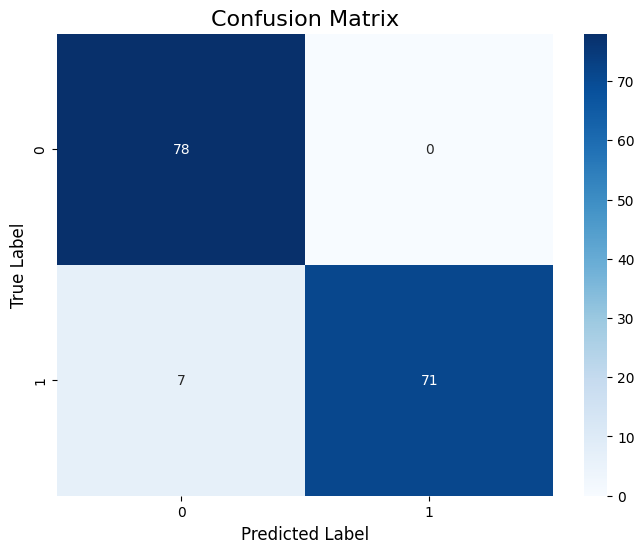

In [26]:
runModelEval(test_dataset)